#### **Task 6**: How many states cover 50% of US air traffic? 

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [3]:
df_flights = pd.read_csv(r'..\..\csvs\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
filter = df_flights[['origin_city_name','dest_city_name','flights']]
filter.head()

,origin_city_name,dest_city_name,flights
0,"Las Vegas, NV","Oklahoma City, OK",1
1,"Las Vegas, NV","Omaha, NE",1
2,"Las Vegas, NV","Omaha, NE",1
3,"Las Vegas, NV","Ontario, CA",1
4,"Las Vegas, NV","Ontario, CA",1


In [5]:
new_origin = filter['origin_city_name'].str.split(",", n = 1, expand = True)
new_origin.head()

,0,1
0,Las Vegas,NV
1,Las Vegas,NV
2,Las Vegas,NV
3,Las Vegas,NV
4,Las Vegas,NV


In [6]:
new_dest = filter['dest_city_name'].str.split(",", n = 1, expand = True)
new_dest.head()

,0,1
0,Oklahoma City,OK
1,Omaha,NE
2,Omaha,NE
3,Ontario,CA
4,Ontario,CA


In [7]:
filter['origin_state'] = new_origin[1]
filter['dest_state'] = new_dest[1]
filter.head()

C:\Users\User\AppData\Local\Temp\ipykernel_31396\4092038663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['origin_state'] = new_origin[1]
C:\Users\User\AppData\Local\Temp\ipykernel_31396\4092038663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['dest_state'] = new_dest[1]


,origin_city_name,dest_city_name,flights,origin_state,dest_state
0,"Las Vegas, NV","Oklahoma City, OK",1,NV,OK
1,"Las Vegas, NV","Omaha, NE",1,NV,NE
2,"Las Vegas, NV","Omaha, NE",1,NV,NE
3,"Las Vegas, NV","Ontario, CA",1,NV,CA
4,"Las Vegas, NV","Ontario, CA",1,NV,CA


In [8]:
flights_by_state = filter.groupby(['origin_state','dest_state'], as_index=False).sum('flights').sort_values(by='flights',ascending=False)
flights_by_state.head()

,origin_state,dest_state,flights
81,CA,CA,3325
1150,TX,TX,2525
113,CA,TX,997
1114,TX,CA,901
250,FL,NY,895


In [9]:
flights_by_state['percent_total_flights'] = 100*(flights_by_state['flights']/flights_by_state['flights'].sum())
flights_by_state.head()

,origin_state,dest_state,flights,percent_total_flights
81,CA,CA,3325,3.292144
1150,TX,TX,2525,2.500050
113,CA,TX,997,0.987148
1114,TX,CA,901,0.892097
250,FL,NY,895,0.886156


In [10]:
flights_by_state['cum_percent'] = 100*(flights_by_state.flights.cumsum() / flights_by_state.flights.sum())
flights_by_state.head()

,origin_state,dest_state,flights,percent_total_flights,cum_percent
81,CA,CA,3325,3.292144,3.292144
1150,TX,TX,2525,2.500050,5.792194
113,CA,TX,997,0.987148,6.779342
1114,TX,CA,901,0.892097,7.671439
250,FL,NY,895,0.886156,8.557595


In [11]:
flights_by_state.shape

(1302, 5)

In [12]:
highest_traffic = flights_by_state.loc[flights_by_state['cum_percent'] <= 50,:]
highest_traffic.head()

,origin_state,dest_state,flights,percent_total_flights,cum_percent
81,CA,CA,3325,3.292144,3.292144
1150,TX,TX,2525,2.500050,5.792194
113,CA,TX,997,0.987148,6.779342
1114,TX,CA,901,0.892097,7.671439
250,FL,NY,895,0.886156,8.557595


In [13]:
highest_traffic.shape

(122, 5)

In [14]:
highest_traffic.groupby(['origin_state','dest_state']).sum('flights').sort_values(by='flights', ascending=False)

flights  percent_total_flights  cum_percent
origin_state dest_state                                             
 CA           CA            3325               3.292144     3.292144
 TX           TX            2525               2.500050     5.792194
 CA           TX             997               0.987148     6.779342
 TX           CA             901               0.892097     7.671439
 FL           NY             895               0.886156     8.557595
              GA             889               0.880215     9.437811
 GA           FL             879               0.870314    10.308125
 HI           HI             868               0.859423    11.167548
 NY           FL             848               0.839621    12.007168
 FL           TX             778               0.770312    12.777481
 CA           NV             745               0.737638    13.515119
 NV           CA             743               0.735658    14.250777
 AZ           CA             733               0.725757    14.976534
 CA           AZ             730               0.722787    15.699321
 TX           FL             678               0.671300    16.370621
 CA           WA             607               0.601002    16.971623
 WA           CA             587               0.581200    17.552823
 CO           CA             555               0.549516    18.102339
 CA           CO             551               0.545555    18.647894
 FL           NC             539               0.533674    19.181568
 NC           FL             531               0.525753    19.707321
 WA           WA             503               0.498030    20.205351
 CA           OR             490               0.485158    20.690509
 IL           FL             482               0.477237    21.167746
 FL           FL             481               0.476247    21.643993
 OR           CA             462               0.457435    22.101428
 IL           CA             445               0.440603    22.542031
 GA           TX             444               0.439613    22.981643
 NC           NC             440               0.435652    23.417295
 CO           TX             436               0.431692    23.848987
 NY           IL             431               0.426741    24.275728
 FL           IL             429               0.424761    24.700489
 TX           CO             428               0.423771    25.124260
 UT           CA             421               0.416840    25.541100
 NY           CA             420               0.415850    25.956950
 IL           NY             417               0.412879    26.369829
 CA           NY             395               0.391097    26.760926
 NJ           FL             390               0.386146    27.147072
 IL           TX             389               0.385156    27.532228
 CA           IL             387               0.383176    27.915404
 FL           NJ             386               0.382186    28.297590
 TX           LA             384               0.380206    28.677796
 OH           IL             373               0.369314    29.047110
 TX           IL             370               0.366344    29.413454
              GA             365               0.361393    29.774847
 IL           MI             362               0.358423    30.133270
 LA           TX             359               0.355453    30.488723
 CA           UT             358               0.354462    30.843185
 IL           OH             356               0.352482    31.195667
 PA           FL             349               0.345551    31.541219
 CO           CO             346               0.342581    31.883800
 NC           GA             344               0.340601    32.565001
 MI           IL             344               0.340601    32.224400
              MI             338               0.334660    32.899661
 NC           NY             332               0.328719    33.228381
 GA           NC             329               0.325749    33.554130
 TX           AZ       

In [15]:
highest_traffic_plot = highest_traffic[['origin_state','flights']]
highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())
highest_traffic_plot = highest_traffic_plot.groupby('origin_state',as_index=False).sum('flights').sort_values(by='flights', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_31396\3693035196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())


Text(0.5, 1.0, 'States Accounting for 50% of Air Travel, by Origin State')

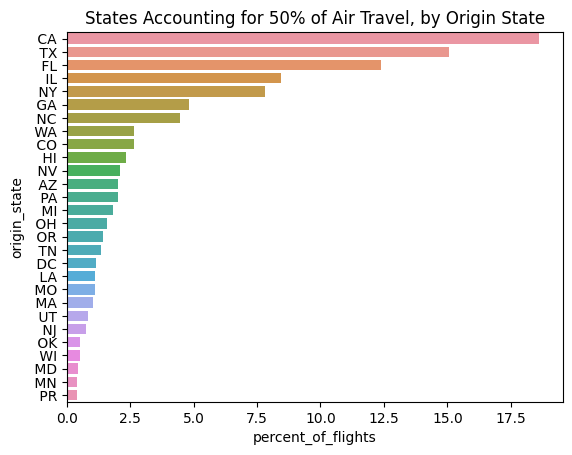

In [16]:
g = sns.barplot(data=highest_traffic_plot, x='percent_of_flights',  y='origin_state')
g.set_title('States Accounting for 50% of Air Travel, by Origin State')

In [17]:
highest_traffic_plot = highest_traffic[['dest_state','flights']]
highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())
highest_traffic_plot = highest_traffic_plot.groupby('dest_state',as_index=False).sum('flights').sort_values(by='flights', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_31396\3680181209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_traffic_plot['percent_of_flights'] = 100*(highest_traffic['flights'] / highest_traffic['flights'].sum())


Text(0.5, 1.0, 'States Accounting for 50% of Air Travel, by Destination State')

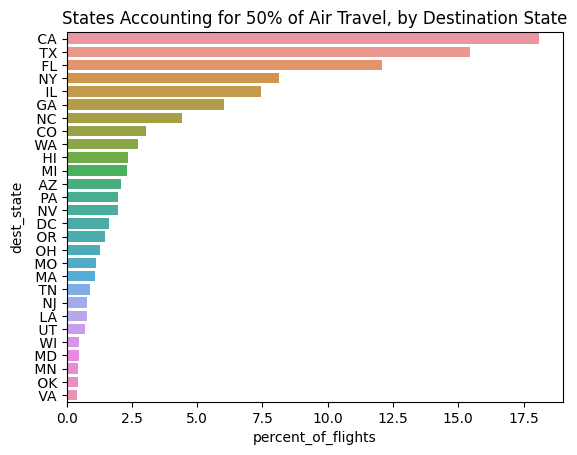

In [18]:
g = sns.barplot(data=highest_traffic_plot, x='percent_of_flights',  y='dest_state')
g.set_title('States Accounting for 50% of Air Travel, by Destination State')

In [19]:
states = set(highest_traffic['origin_state']) | set(highest_traffic['dest_state'])
states

{' AZ',
 ' CA',
 ' CO',
 ' DC',
 ' FL',
 ' GA',
 ' HI',
 ' IL',
 ' LA',
 ' MA',
 ' MD',
 ' MI',
 ' MN',
 ' MO',
 ' NC',
 ' NJ',
 ' NV',
 ' NY',
 ' OH',
 ' OK',
 ' OR',
 ' PA',
 ' PR',
 ' TN',
 ' TX',
 ' UT',
 ' VA',
 ' WA',
 ' WI'}

In [20]:
len(states)

29

#### 50% of air traffic occurs across 29 states, with most CA, TX, FL accounting for the most air traffic

#### Implications for Feature Engineering:
- look at whether state or region predicts arr_delay
- if so, extract state, region from origin / destination city name and use it in model to predict arr_delay